In order to be able to run this code, save the data files and the Jupyter Notebook in the same folder.

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

Load the data:

In [67]:
SOTS = pd.read_csv('SOTS_SOFS_mooring_2011_2012.csv')
SOTS

,Mooring_Name,Latitude,Longitude,Date_MD,Salinity,Temperature_C,pCO2_oc_uatm,pCO2_air_uatm,CT_umolkg,pH_TOTAL
0,SOFS_SOTS,-46.77,141.99,734831.5535,34.697,10.456,356.9,388.6,2093.866509,8.087961
1,SOFS_SOTS,-46.77,141.99,734831.5743,34.697,10.456,356.7,388.6,2093.768816,8.088172
2,SOFS_SOTS,-46.77,141.99,734831.5951,34.698,10.448,356.9,388.6,2093.959602,8.087962
3,SOFS_SOTS,-46.77,141.99,734831.6368,34.697,10.441,356.8,387.6,2093.929675,8.088059
4,SOFS_SOTS,-46.77,141.99,734831.7618,34.696,10.427,356.5,386.5,2093.854280,8.088364
...,...,...,...,...,...,...,...,...,...,...
2416,SOFS_SOTS,-46.77,141.99,735135.2618,34.609,9.433,374.8,380.4,2106.780189,8.068418
2417,SOFS_SOTS,-46.77,141.99,735135.3868,34.611,9.416,373.8,380.6,2106.522550,8.069432
2418,SOFS_SOTS,-46.77,141.99,735135.5118,34.611,9.432,374.6,379.9,2106.765775,8.068631
2419,SOFS_SOTS,-46.77,141.99,735135.6368,34.608,9.410,375.5,379.0,2107.180152,8.067790


# Atmospheric pCO2

First plot pCO2 (air) vs time:

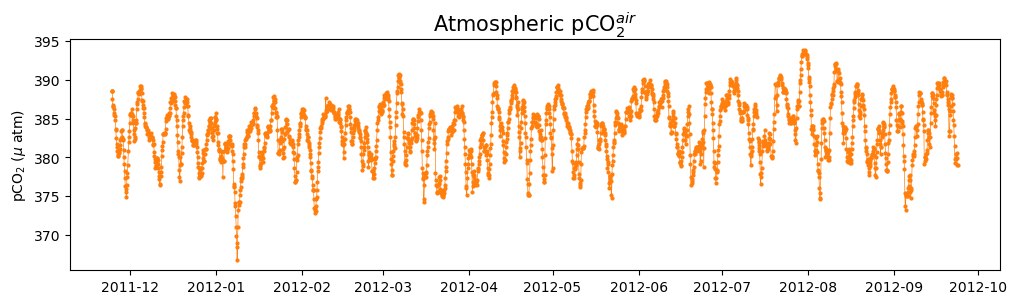

In [84]:
# Convert the numeric dates to datetime format
t = pd.to_datetime(SOTS['Date_MD']-719529, unit='D')

fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, SOTS['pCO2_air_uatm'], 'C1', linewidth = .5, marker = 'o', markersize = 2)
ax.set_ylabel('pCO$_{2}$ ($\\mu$ atm)')
plt.title('Atmospheric pCO$_{2}^{air}$', fontsize = 15);

Let's calculate the mean, add it to the plot and save the figure.

In [ ]:
mpco2_atm = np.mean(SOTS['pCO2_air_uatm'])

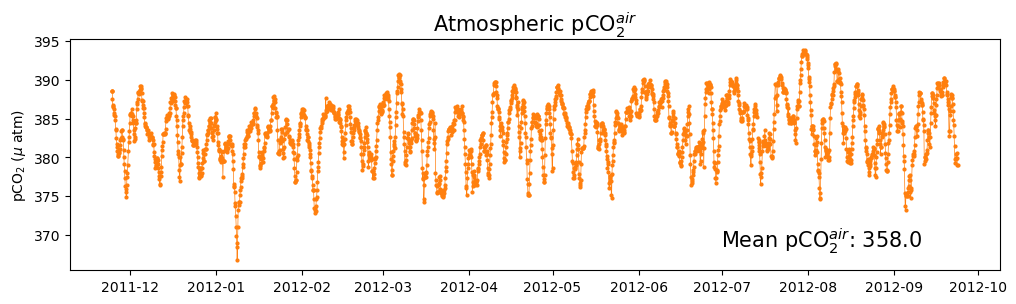

In [85]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, SOTS['pCO2_air_uatm'], 'C1', linewidth = .5, marker = 'o', markersize = 2)
ax.set_title('Atmospheric pCO$_{2}^{air}$', fontsize = 15);
ax.text(0.7, 0.1, 'Mean pCO$_{2}^{air}$: '+str(np.round(mpco2_atm, 0)), 
        fontsize = 15, transform = ax.transAxes);
ax.set_ylabel('pCO$_{2}$ ($\\mu$ atm)')
plt.savefig('pco2_air.png', bbox_inches = 'tight')

# Oceanic pCO2

Do the same for the ocean:

In [ ]:
mpco2_oce = np.mean(SOTS['pCO2_oc_uatm'])

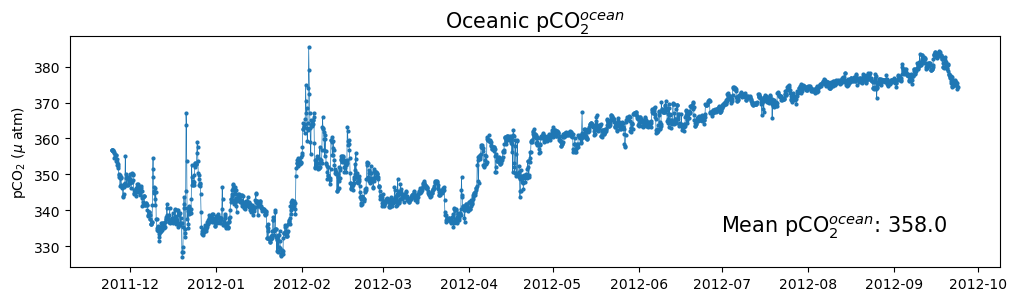

In [86]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, SOTS['pCO2_oc_uatm'], linewidth = .5, marker = 'o', markersize = 2)
ax.set_title('Oceanic pCO$_{2}^{ocean}$', fontsize = 15);
ax.text(0.7, 0.15, 'Mean pCO$_{2}^{ocean}$: '+str(np.round(mpco2_oce, 0)), 
        fontsize = 15, transform = ax.transAxes);
ax.set_ylabel('pCO$_{2}$ ($\\mu$ atm)')
plt.savefig('pco2_oce.png', bbox_inches = 'tight')

# Atmospheric and oceanic pCO2

Put them both together in the same plot

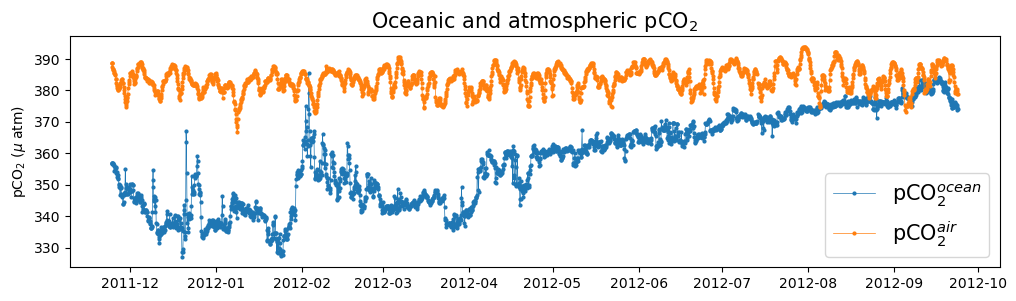

In [87]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, SOTS['pCO2_oc_uatm'], linewidth = .5, marker = 'o', markersize = 2, label = 'pCO$_{2}^{ocean}$')
ax.plot(t, SOTS['pCO2_air_uatm'], 'C1', linewidth = .5, marker = 'o', markersize = 2, label = 'pCO$_{2}^{air}$')
ax.set_title('Oceanic and atmospheric pCO$_{2}$', fontsize = 15);
ax.set_ylabel('pCO$_{2}$ ($\\mu$ atm)')
ax.legend(fontsize = 15);
plt.savefig('pco2_air_and_ocean.png', bbox_inches = 'tight')

# Difference between atmospheric and oceanic pCO2

In [70]:
delta_pco2=SOTS['pCO2_oc_uatm']-SOTS['pCO2_air_uatm']

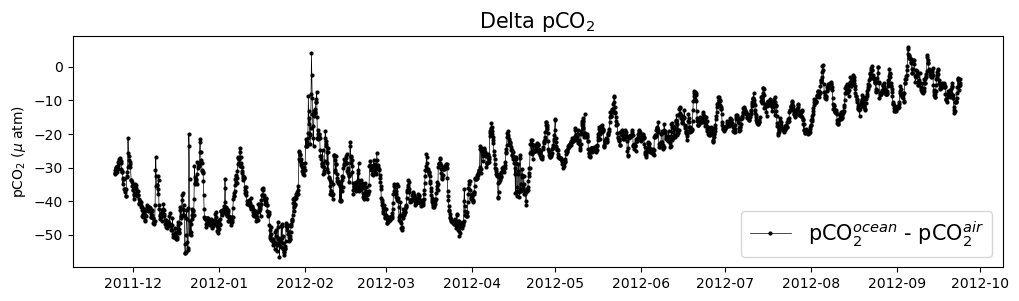

In [88]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, delta_pco2, 'k', linewidth = .5, marker = 'o', markersize = 2, label = 'pCO$_{2}^{ocean}$ - pCO$_{2}^{air}$')
ax.set_title('Delta pCO$_{2}$', fontsize = 15);
ax.set_ylabel('pCO$_{2}$ ($\\mu$ atm)')
ax.legend(fontsize = 15);
plt.savefig('delta_pco2.png', bbox_inches = 'tight')

# Oceanic pco2, temperature and salinity

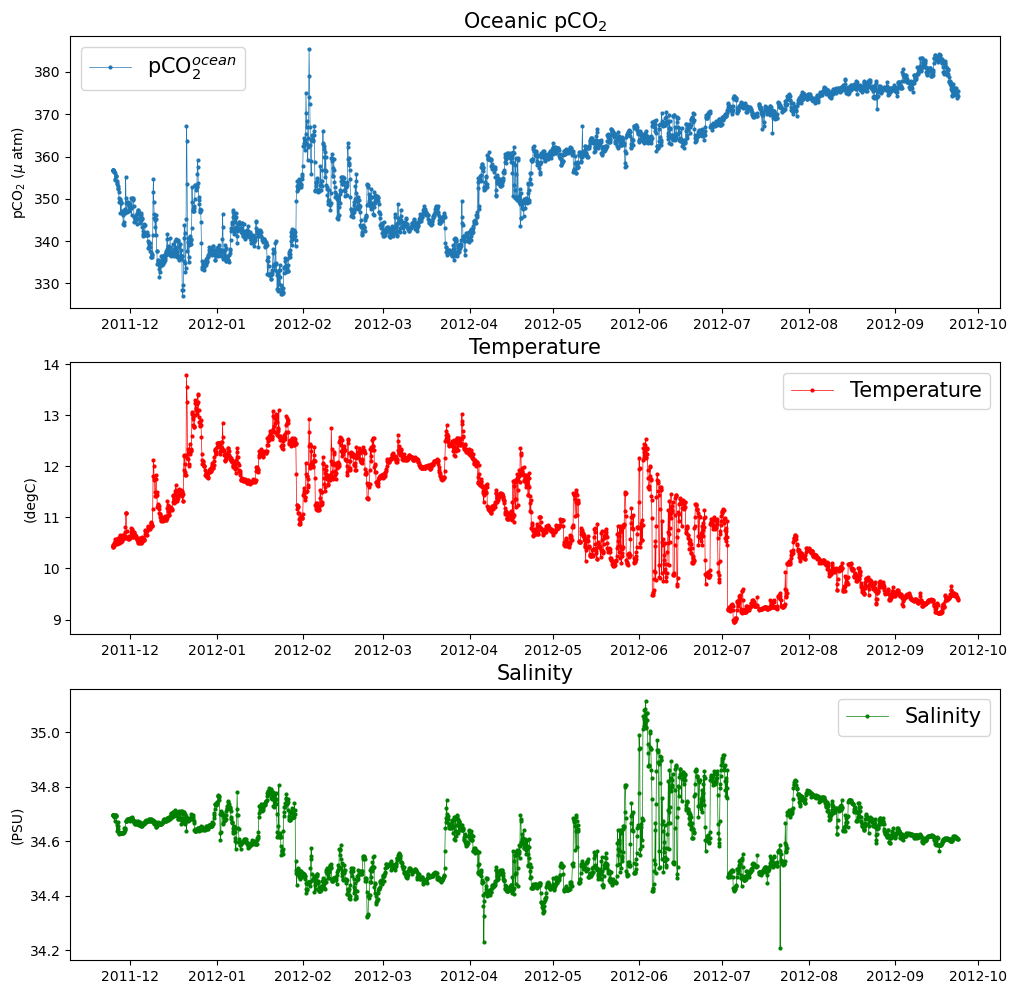

In [91]:
fig, axs = plt.subplots(3, 1, figsize = (12, 12))

axs[0].plot(t, SOTS['pCO2_oc_uatm'], 'C0', linewidth = .5, marker = 'o', markersize = 2, label = 'pCO$_{2}^{ocean}$')
axs[0].set_title('Oceanic pCO$_{2}$', fontsize = 15);
axs[0].set_ylabel('pCO$_{2}$ ($\\mu$ atm)')
axs[0].legend(fontsize = 15);

axs[1].plot(t, SOTS['Temperature_C'], 'r', linewidth = .5, marker = 'o', markersize = 2, label = 'Temperature')
axs[1].set_title('Temperature', fontsize = 15);
axs[1].set_ylabel('(degC)')
axs[1].legend(fontsize = 15);

axs[2].plot(t, SOTS['Salinity'], 'green', linewidth = .5, marker = 'o', markersize = 2, label = 'Salinity')
axs[2].set_title('Salinity', fontsize = 15);
axs[2].set_ylabel('(PSU)')
axs[2].legend(fontsize = 15);
plt.savefig('pco2_T_S.png', bbox_inches = 'tight')

# Alkalinity and salinity

In [92]:
CTD = pd.read_csv('CTDS_SOTS_S_TA.csv')
CTD

,CTD_salinity,Alkalinity_umolkg
0,34.902,2299.03
1,34.683,2296.22
2,34.667,2293.19
3,34.667,2295.52
4,35.027,2309.10
...,...,...
79,34.810,2297.72
80,34.601,2297.16
81,34.603,2301.84
82,34.683,2304.99


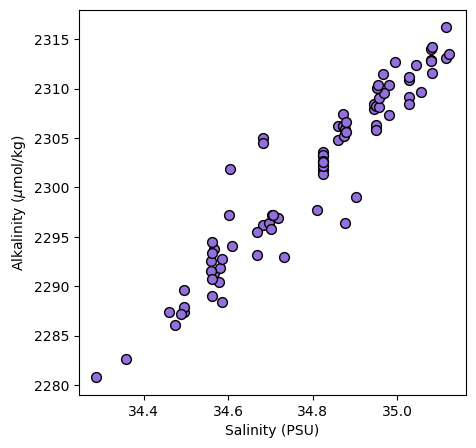

In [103]:
plt.figure(figsize = (5, 5))
plt.scatter(CTD['CTD_salinity'], CTD['Alkalinity_umolkg'], s = 50, c = 'mediumpurple', edgecolors = 'k')
plt.ylabel('Alkalinity ($\\mu$mol/kg)')
plt.xlabel('Salinity (PSU)');

Calculate a linear regression:

In [101]:
LR = st.linregress(CTD['CTD_salinity'], CTD['Alkalinity_umolkg'])
LR

LinregressResult(slope=41.06915941611577, intercept=872.3897834282052, rvalue=0.9550355282340044, pvalue=4.657821047973894e-45, stderr=1.4079960443793864, intercept_stderr=48.99675628062728)

In [109]:
linear_fit = LR.intercept + LR.slope*CTD['CTD_salinity']

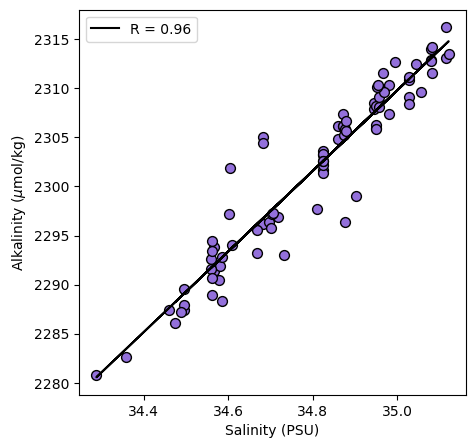

In [113]:
plt.figure(figsize = (5, 5))
plt.scatter(CTD['CTD_salinity'], CTD['Alkalinity_umolkg'], s = 50, c = 'mediumpurple', edgecolors = 'k')
plt.plot(CTD['CTD_salinity'], linear_fit, 'k', label = 'R = '+str(np.round(LR.rvalue, 2)))
plt.ylabel('Alkalinity ($\\mu$mol/kg)')
plt.xlabel('Salinity (PSU)');
plt.legend();
plt.savefig('alkalinity_fit.png', bbox_inches = 'tight')

# Estimate alkalinity for SOTS

In [114]:
alkalinity_SOTS = LR.intercept + LR.slope*SOTS['Salinity']

In [115]:
malk = np.mean(alkalinity_SOTS)

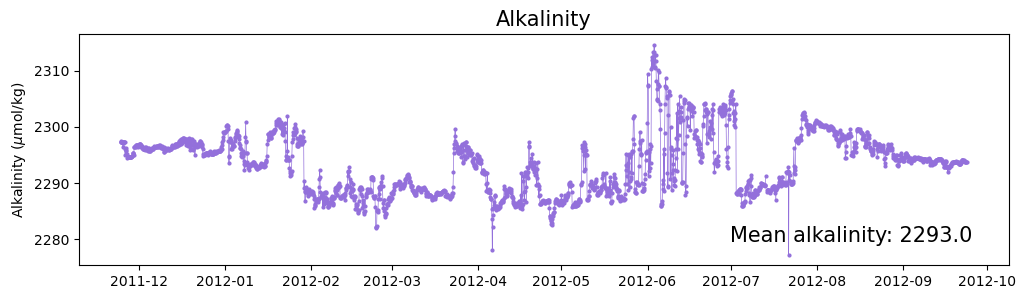

In [117]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, alkalinity_SOTS, 'mediumpurple', linewidth = .5, marker = 'o', markersize = 2)
ax.set_title('Alkalinity', fontsize = 15);
ax.text(0.7, 0.1, 'Mean alkalinity: '+str(np.round(malk, 0)), 
        fontsize = 15, transform = ax.transAxes);
ax.set_ylabel('Alkalinity ($\\mu$mol/kg)')
plt.savefig('alkalinity_estimated.png', bbox_inches = 'tight')

# Total carbon

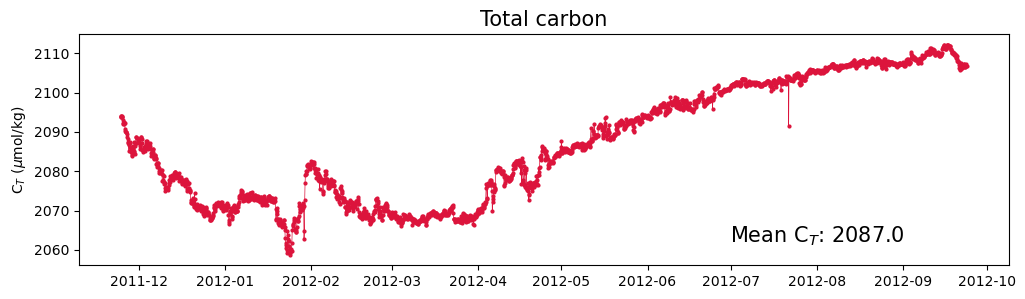

In [120]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, SOTS['CT_umolkg'], 'crimson', linewidth = .5, marker = 'o', markersize = 2)
ax.set_title('Total carbon', fontsize = 15);
ax.text(0.7, 0.1, 'Mean C$_T$: '+str(np.round(np.mean(SOTS['CT_umolkg']), 0)), 
        fontsize = 15, transform = ax.transAxes);
ax.set_ylabel('C$_T$ ($\\mu$mol/kg)')
plt.savefig('total_carbon.png', bbox_inches = 'tight')

# pH

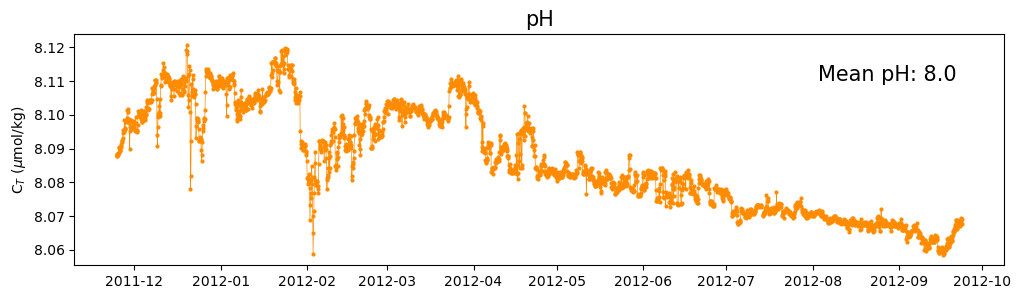

In [122]:
fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(t, SOTS['pH_TOTAL'], 'darkorange', linewidth = .5, marker = 'o', markersize = 2)
ax.set_title('pH', fontsize = 15);
ax.text(0.8, 0.8, 'Mean pH: '+str(np.round(np.mean(SOTS['pH_TOTAL']), 0)), 
        fontsize = 15, transform = ax.transAxes);
ax.set_ylabel('C$_T$ ($\\mu$mol/kg)')
plt.savefig('pH.png', bbox_inches = 'tight')

# Atmospheric pCO2, alkalinity, total carbon and pH 

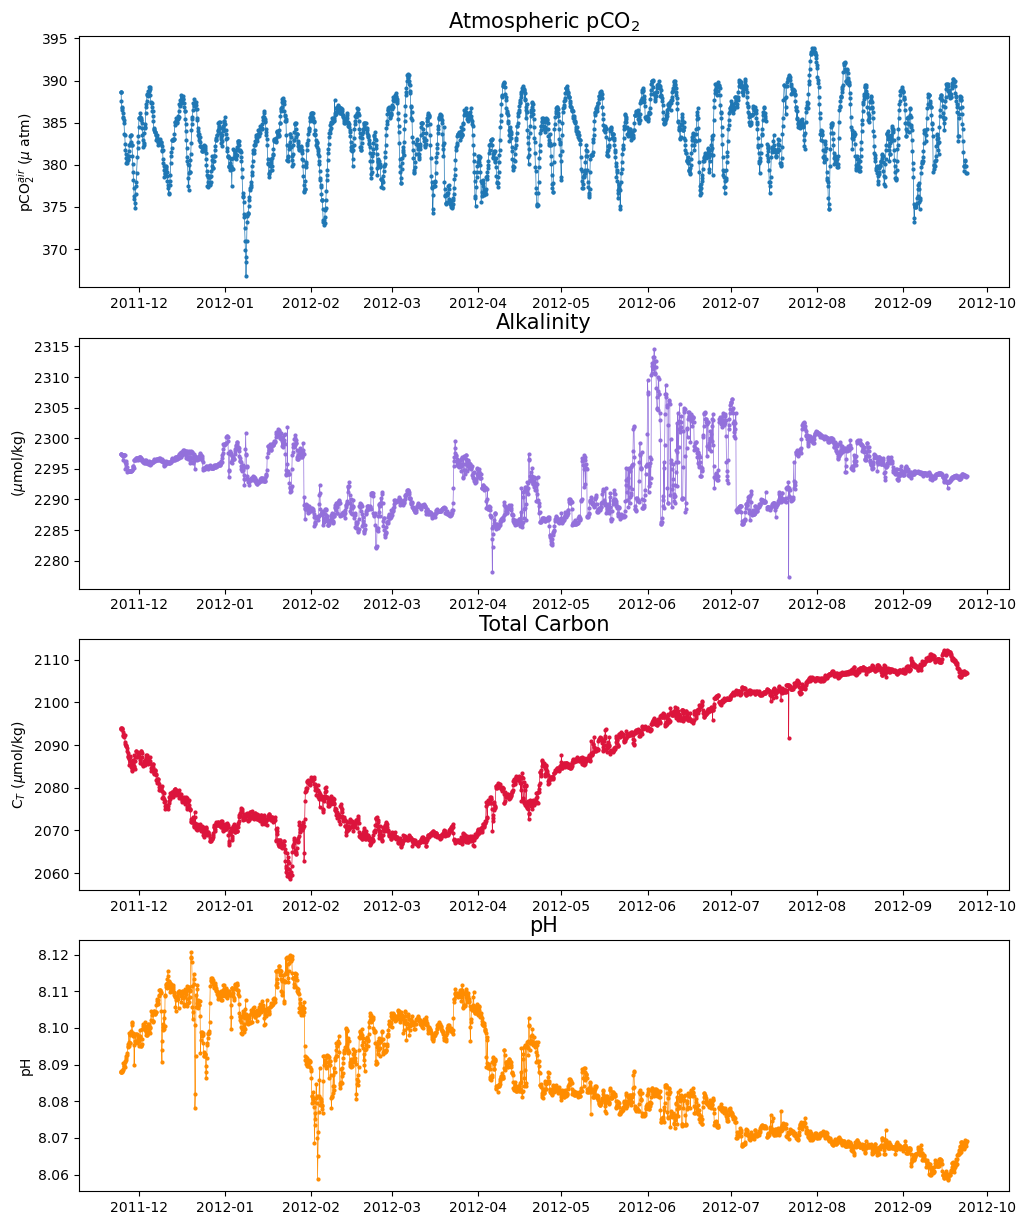

In [126]:
fig, axs = plt.subplots(4, 1, figsize = (12, 15))

axs[0].plot(t, SOTS['pCO2_air_uatm'], 'C0', linewidth = .5, marker = 'o', markersize = 2)
axs[0].set_title('Atmospheric pCO$_{2}$', fontsize = 15);
axs[0].set_ylabel('pCO$_{2}^{air}$ ($\\mu$ atm)')
ax.text(0.7, 0.1, 'Mean pCO$_{2}^{air}$: '+str(np.round(np.mean(SOTS['pCO2_oc_uatm']), 0)), 
        fontsize = 15, transform = axs[0].transAxes);

axs[1].plot(t, alkalinity_SOTS, 'mediumpurple', linewidth = .5, marker = 'o', markersize = 2)
axs[1].set_title('Alkalinity', fontsize = 15);
axs[1].set_ylabel('($\\mu$mol/kg)')
ax.text(0.7, 0.1, 'Mean alkalinity: '+str(np.round(np.mean(alkalinity_SOTS), 0)), 
        fontsize = 15, transform = axs[1].transAxes);

axs[2].plot(t, SOTS['CT_umolkg'], 'crimson', linewidth = .5, marker = 'o', markersize = 2)
axs[2].set_title('Total Carbon', fontsize = 15);
axs[2].set_ylabel('C$_T$ ($\\mu$mol/kg)')
ax.text(0.7, 0.1, 'Mean C$_T$: '+str(np.round(np.mean(SOTS['CT_umolkg']), 0)), 
        fontsize = 15, transform = axs[2].transAxes);

axs[3].plot(t, SOTS['pH_TOTAL'], 'darkorange', linewidth = .5, marker = 'o', markersize = 2)
axs[3].set_title('pH', fontsize = 15);
axs[3].set_ylabel('pH')
ax.text(0.7, 0.1, 'Mean pH: '+str(np.round(np.mean(SOTS['pH_TOTAL']), 0)), 
        fontsize = 15, transform = axs[3].transAxes);

plt.savefig('carbon_system_pH.png', bbox_inches = 'tight')